In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [158]:
# load .csv file
# data = pd.read_csv('wandb_testing_vals.csv', delimiter=',')
data = pd.read_csv('wandb_testing_vals_nonan_44_epochs.csv', delimiter=',')

In [159]:
new_data = pd.DataFrame()
for column in data.columns:
    series = data[column].dropna()
    new_data[column] = series


In [160]:
import matplotlib.pyplot as plt
to_plot_data = new_data[int(0.8*len(new_data)):]

In [161]:
len(range(1, len(to_plot_data.columns), 3))

8

In [162]:
to_plot_data.columns[1][18:]

'est_Mean_Angular_Distance_EPNP'

In [163]:
for i in list(range(1, len(to_plot_data.columns), 3)):
    q1, q2, q3 = np.quantile(to_plot_data.iloc[:,i].dropna(), [0.25, 0.5, 0.75])
    print(q1, q2, q3, i, to_plot_data.columns[i][18:])


22.15492872077097 34.690386657897164 146.77453875718464 1 est_Mean_Angular_Distance_EPNP
117.8730768174137 130.83126901011147 145.78908472837804 4 est_Mean_Angular_Distance_AP3P
90.07948517285725 112.72605758384027 157.891792946436 7 est_Mean_Angular_Distance_ITERATIVE
30.047126688207022 131.4334320351051 155.6046485573436 10 est_Mean_Angular_Distance_SQPNP
79.70980736102017 154.44968797681463 171.3152691237522 13 est_Mean_Angular_Distance_IPPE
103.26451842354508 125.2427311966188 147.6341279088697 16 est_Mean_Angular_Distance_P3P
35.06036980650474 77.90358288499148 150.24895519683622 19 est_Mean_Angular_Distance_UPNP
22.15492872077097 34.690386657897164 146.77453875718464 22 est_Mean_Angular_Distance_DLS


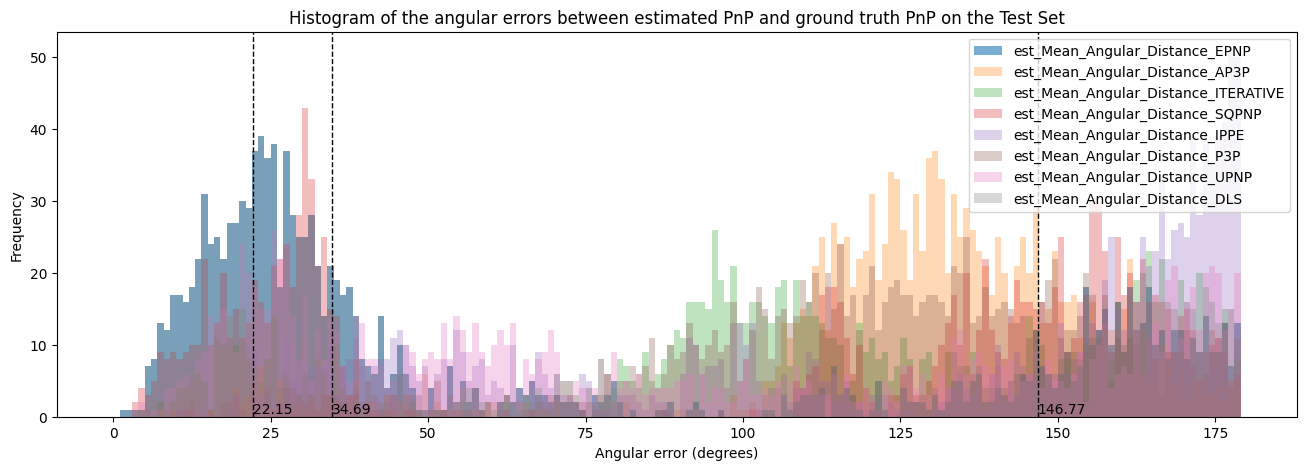

In [164]:
plt.figure(figsize=(16,5))
bins = np.arange(0, 180, 1)
for i in range(1, len(to_plot_data.columns), 3):
    if to_plot_data.columns[i][-4:] == 'EPNP':
        alpha = 0.6
    else:
        alpha = 0.3
    plt.hist(to_plot_data.iloc[:,i], alpha=alpha, bins=bins, label=to_plot_data.columns[i][18:])

q1, q2, q3 = np.quantile(to_plot_data.iloc[:,1].dropna(), [0.25, 0.5, 0.75])
plt.axvline(q1, color='k', linestyle='dashed', linewidth=1)
plt.text(q1, .5, f'{q1:.2f}')
plt.axvline(q2, color='k', linestyle='dashed', linewidth=1)
plt.text(q2, .5, f'{q2:.2f}')
plt.axvline(q3, color='k', linestyle='dashed', linewidth=1)
plt.text(q3, .5, f'{q3:.2f}')

plt.title('Histogram of the angular errors between estimated PnP and ground truth PnP on the Test Set')
plt.xlabel('Angular error (degrees)')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()


In [165]:
list(range(0, 100, step))

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

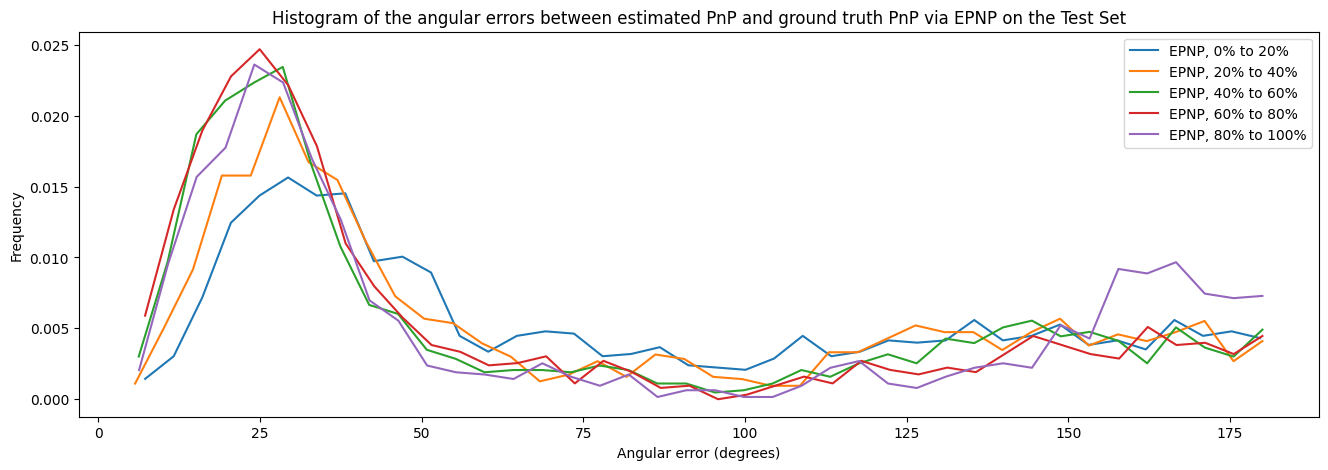

In [166]:
## taking the best one, EPNP and DLS, and plotting it through time every 10% of the training

plt.figure(figsize=(16,5))
bins = np.arange(0, 180, 1)


import matplotlib.pyplot as plt
step = 20
for i in range(0, 100, step):
    to_plot_data = new_data[int((i/100)*len(new_data)):int(((i+step)/100)*len(new_data))]
    
    # use EPNP for now
    y, x = np.histogram(to_plot_data.iloc[:,1].dropna(), bins=40, density=True)
    plt.plot(x[1:], y, label=f'EPNP, {i}% to {i+step}%')

# q1, q2, q3 = np.quantile(new_data[int((40/100)*len(new_data)):int(((40+step)/100)*len(new_data))].iloc[:,1].dropna(), [0.25, 0.5, 0.75])
# plt.axvline(q1, color='k', linestyle='dashed', linewidth=1)
# plt.text(q1, .5, f'{q1:.2f}')
# plt.axvline(q2, color='k', linestyle='dashed', linewidth=1)
# plt.text(q2, .5, f'{q2:.2f}')
# plt.axvline(q3, color='k', linestyle='dashed', linewidth=1)
# plt.text(q3, .5, f'{q3:.2f}')

plt.title('Histogram of the angular errors between estimated PnP and ground truth PnP via EPNP on the Test Set')
plt.xlabel('Angular error (degrees)')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()


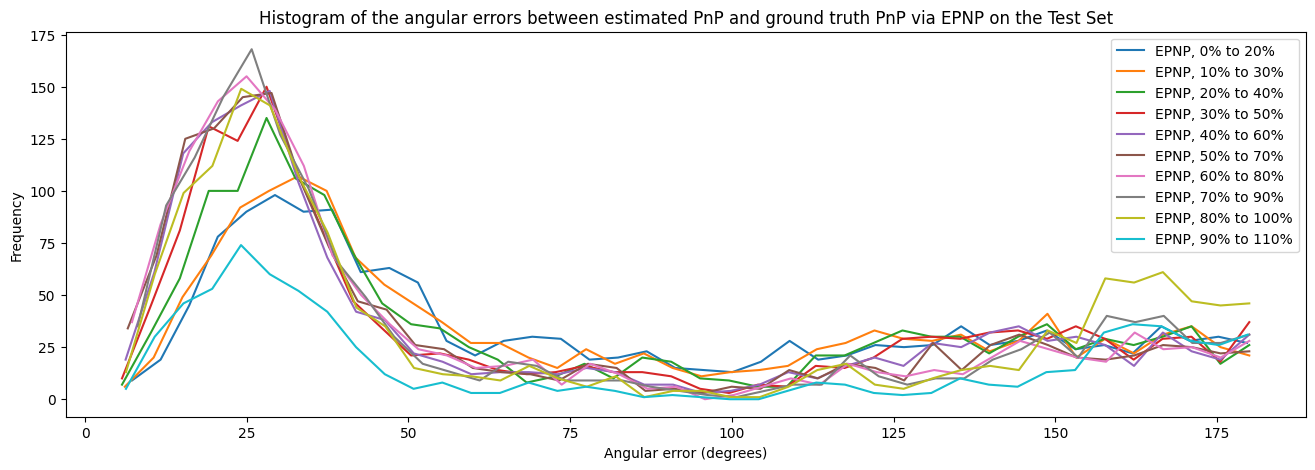

In [168]:
## taking the best one, EPNP and DLS, and plotting it through time every 10% of the training

plt.figure(figsize=(16,5))
bins = np.arange(0, 180, 1)


import matplotlib.pyplot as plt
step = 10
for i in range(0, 100, step):
    to_plot_data = new_data[int((i/100)*len(new_data)):int(((i+20)/100)*len(new_data))]
    
    # use EPNP for now
    y, x = np.histogram(to_plot_data.iloc[:,1].dropna(), bins=40, density=False)
    plt.plot(x[1:], y, label=f'EPNP, {i}% to {i+20}%')

# val = 80
# to_plot_data = new_data[int((val/100)*len(new_data)):int(((val+step)/100)*len(new_data))]
# q1, q2, q3 = np.quantile(to_plot_data.iloc[:,1].dropna(), [0.25, 0.5, 0.75])
# plt.axvline(q1, color='k', linestyle='dashed', linewidth=1)
# plt.text(q1, .5, f'{q1:.2f}')
# plt.axvline(q2, color='k', linestyle='dashed', linewidth=1)
# plt.text(q2, .5, f'{q2:.2f}')
# plt.axvline(q3, color='k', linestyle='dashed', linewidth=1)
# plt.text(q3, .5, f'{q3:.2f}')

plt.title('Histogram of the angular errors between estimated PnP and ground truth PnP via EPNP on the Test Set')
plt.xlabel('Angular error (degrees)')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()
